In [9]:
#  Import a bunch of stuff
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'hot'
import IPython.display as ipd
import tensorflow as tf
import soundfile as sf
import librosa
import librosa.display

import audio_functions as af
import audio_models
import dataset

In [5]:
#  Set variables
sample_rate=16384
n_fft=1024
fft_hop=256
patch_window=256
patch_hop=128
n_parallel_readers=4
normalise=True
batch_size = 5
shuffle=False
n_shuffle = 1

checkpoint = '43/43-1001'
model_base_dir = 'C:/Users/Toby/MSc_Project/MScFinalProjectCheckpoints'

#directory_a = 'C:/Users/Toby/MSc_Project/Test_Audio/CHiME/test/Mixed'
#directory_b = 'C:/Users/Toby/MSc_Project/Test_Audio/CHiME/test/Voice'

directory_a = 'C:/Users/Toby/Speech_Data/LibriSpeechMini/Mixed/train-clean-100/19/198/'
directory_b = 'C:/Users/Toby/Speech_Data/LibriSpeechMini/Voice/train-clean-100/19/198/'

#directory_a = '/home/enterprise.internal.city.ac.uk/acvn728/LibriSpeechMini/Mixed/train-clean-100/19/198/'
#directory_b = '/home/enterprise.internal.city.ac.uk/acvn728/LibriSpeechMini/Voice/train-clean-100/19/198/'

#  Create the pipeline
tf.reset_default_graph()
data = dataset.zip_files(directory_a, directory_b)
data = dataset.get_paired_dataset(data,
                                  sample_rate,
                                  n_fft,
                                  fft_hop,
                                  patch_window,
                                  patch_hop,
                                  n_parallel_readers,
                                  batch_size,
                                  n_shuffle,
                                  normalise)

#  Create the iterator
mixed_spec, voice_spec, mixed_audio, voice_audio = data.make_one_shot_iterator().get_next()

#  Create variable placeholders
is_training = tf.placeholder(shape=(), dtype=bool)
mixed_mag = tf.expand_dims(mixed_spec[:, :, :-1, 0], 3)
mixed_phase = tf.expand_dims(mixed_spec[:, :, :-1, 1], 3)
voice_mag = tf.expand_dims(voice_spec[:, :, :-1, 0], 3)

In [25]:
# Take a file, and compare the magnitude spectrogram to a constant-Q transform

file_a = 'C:/Users/Toby/Speech_Data/LibriSpeechMini/Mixed/train-clean-100/19/198/19-198-0001.flac'
audio, native_sample_rate = sf.read(file_a)
audio = librosa.core.resample(audio, native_sample_rate, sample_rate)

spec = librosa.stft(audio, n_fft=n_fft, hop_length=fft_hop, window='hann')
mag = np.abs(spec)
mag = (mag - mag.min()) / (mag.max() - mag.min())

cqt = librosa.core.cqt(audio, sr=sample_rate, hop_length=fft_hop)
cqt_mag = np.abs(cqt)
cqt_mag = (cqt_mag - cqt_mag.min()) / (cqt_mag.max() - cqt_mag.min())

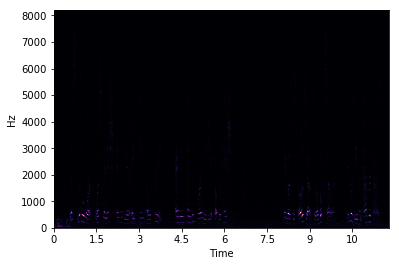

In [17]:
librosa.display.specshow(mag, sr=sample_rate, hop_length=fft_hop, x_axis='time', y_axis='hz')

In [18]:
ipd.Audio(audio, rate=sample_rate)

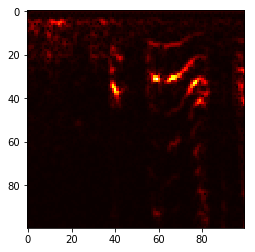

In [20]:
plt.imshow(mag[:100,:100])

C:\Program Files\Anaconda3\lib\site-packages\librosa\display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


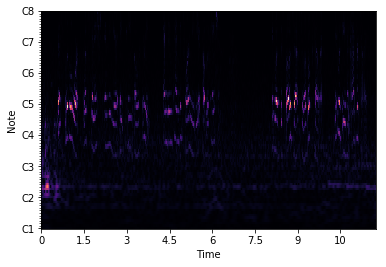

In [30]:
librosa.display.specshow(cqt, sr=sample_rate, hop_length=fft_hop, x_axis='time', y_axis='cqt_note')

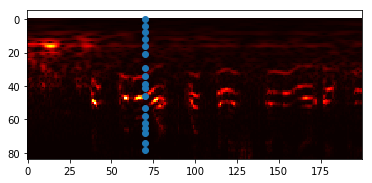

In [41]:
plt.imshow(cqt_mag[:,:200])
plt.scatter(x,y)

In [ ]:
cqt_slice = cqt_mag[:,70]

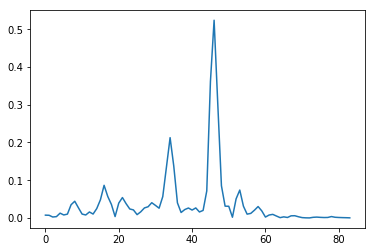

In [43]:
plt.plot(range(len(cqt_slice)),cqt_slice)

In [42]:
cqt_slice = np.convolve(cqt_slice)
maxima = np.r_[True, cqt_slice[1:] > cqt_slice[:-1]] & np.r_[cqt_slice[:-1] > cqt_slice[1:], True]
y = [i for i,j in zip(np.arange(len(maxima)), maxima) if j]
x = np.ones(len(y))*70

TypeError: convolve() missing 1 required positional argument: 'v'

In [38]:
y

[0, 4, 8, 12, 16, 21, 29, 34, 39, 41, 46, 53, 58, 62, 65, 68, 74, 78]

In [39]:
maxima

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False])